In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report   
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns





In [51]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
# Display the first few rows of the dataset


In [78]:
#create dataframe
print(df.head())
# Check for missing values


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [56]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [79]:
print(df.isnull().sum())
# In this dataset, there are no missing values, but some features have zero values which are not possible (e.g., Glucose, BloodPressure, SkinThickness, Insulin, BMI). We will treat these zeros as missing values.
# Replace zero values with NaN for specific columns
cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)
# Check the number of missing values again
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [57]:
#display basic statistics
print("describe the data")
print(df.describe())

#check for mean
print(f"mean values")
print(df.mean())
# check for median
print(f"Median values")
print("median values",df.median())
#check for mode
print(f"Mode values")
print(df.mode())
#chec for std deviation
print(f"standard devitation")
print(df.std())

describe the data
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000

In [58]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = make_pipeline(   
    SimpleImputer(strategy='mean'), 
    StandardScaler(),                
    LogisticRegression()             
)



In [59]:
#train the model
pipeline.fit(X_train, y_train)
#make predictions
y_pred = pipeline.predict(X_test)
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Precision, Recall, F1-score

print("Classification Report:")
print(classification_report(y_test, y_pred))
#save the model
joblib.dump(pipeline, 'diabetes_model.pkl')
#load the model
loaded_model = joblib.load('diabetes_model.pkl')
#make predictions with the loaded model
loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded Model Accuracy: {loaded_accuracy:.2f}")



Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Loaded Model Accuracy: 0.74


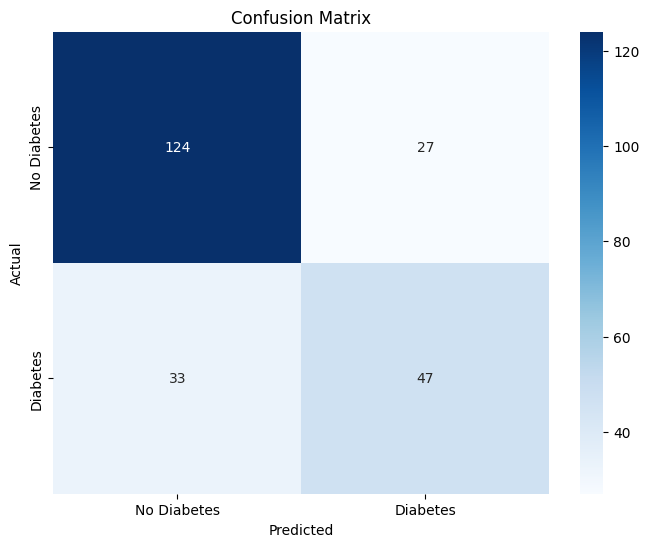

In [60]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.80


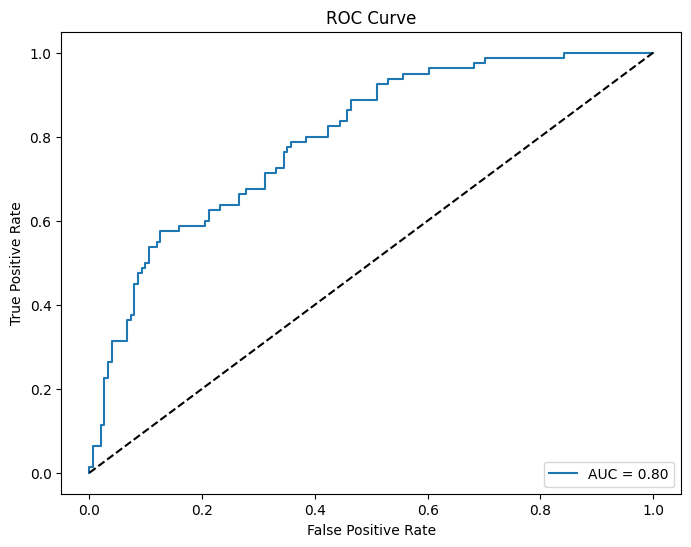

In [61]:
#ROC Curve & AUC Score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns

y_prob = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [62]:
#Predict on the test set.
y_pred = pipeline.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
#calcuate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.74


In [64]:
#Train a Decision Tree Classifier (use max_depth = 4).

from sklearn.tree import DecisionTreeClassifier
dt_pipeline = make_pipeline(   
    SimpleImputer(strategy='mean'), 
    StandardScaler(),                
    DecisionTreeClassifier(max_depth=4)             
)
dt_pipeline.fit(X_train, y_train)
dt_y_pred = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

Decision Tree Accuracy: 0.71
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       151
           1       0.56      0.74      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.74      0.71      0.71       231



In [65]:
#precision, recall, f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
plt.show()



Precision: 0.64
Recall: 0.59
F1-Score: 0.61


Confusion Matrix:
[[124  27]
 [ 33  47]]


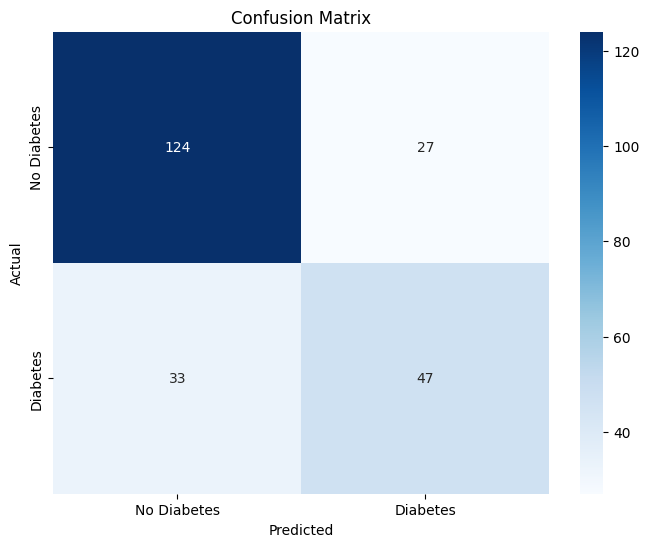

In [66]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.80


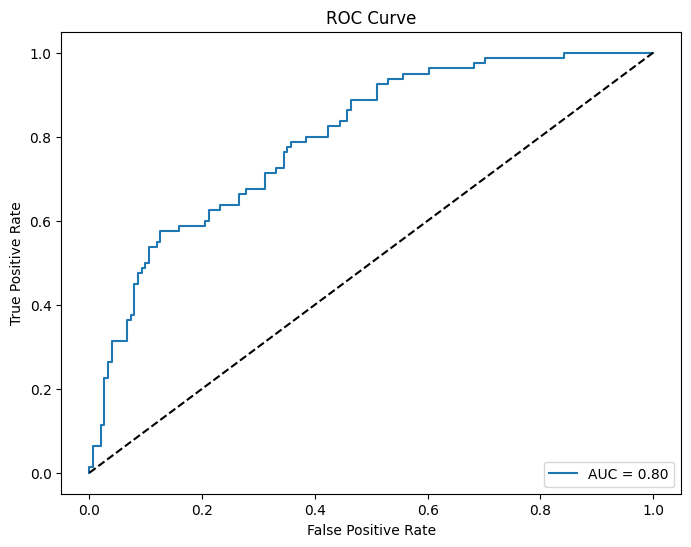

In [67]:
# ROC Curve & AUC Score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_prob = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

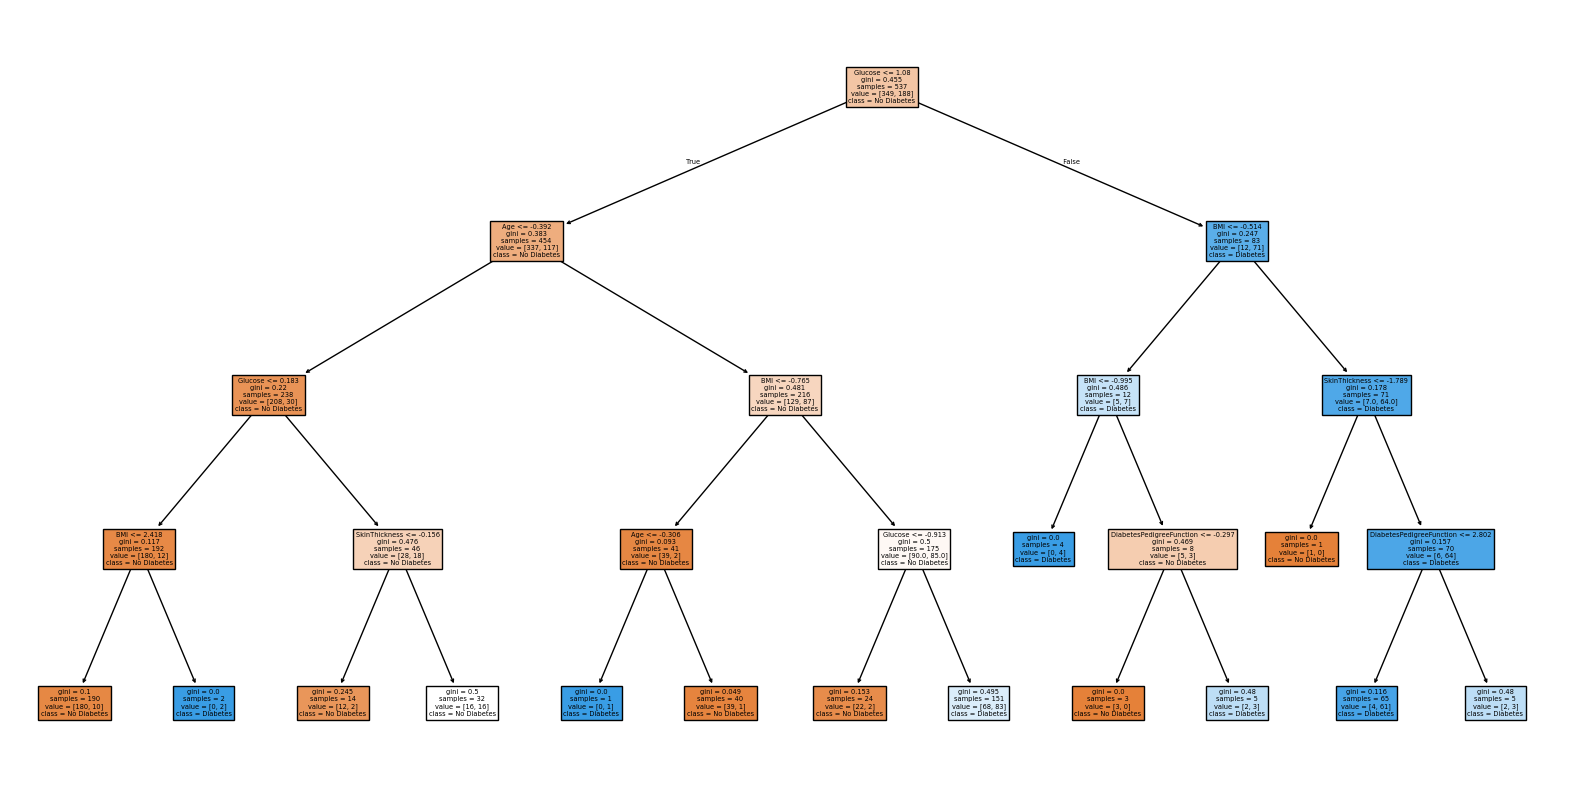

In [ ]:
#Plot the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_pipeline.named_steps['decisiontreeclassifier'], feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()
# The first split in the decision tree is based on the "Glucose" feature. This indicates that the model found "Glucose" to be the most informative feature for distinguishing between diabetic and non-diabetic patients at the root level. A higher glucose level is often associated with diabetes, which is likely why the decision tree prioritized this feature for the initial split.


In [ ]:
# Comparision of  Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC).

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
# You can similarly compute and print precision, recall, F1, and AUC for both models as done above.
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_y_prob = dt_pipeline.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_y_prob)
print(f"Logistic Regression Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, AUC: {auc_score:.2f}")
print(f"Decision Tree Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1-Score: {dt_f1:.2f}, AUC: {dt_auc:.2f}")


Logistic Regression Accuracy: 0.74
Decision Tree Accuracy: 0.71
Logistic Regression Precision: 0.64, Recall: 0.59, F1-Score: 0.61, AUC: 0.80
Decision Tree Precision: 0.56, Recall: 0.74, F1-Score: 0.63, AUC: 0.73


In [81]:
# table format.
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [accuracy, precision, recall, f1, auc_score],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc]
})  
print(results)


      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.740260       0.705628
1  Precision             0.635135       0.556604
2     Recall             0.587500       0.737500
3   F1-Score             0.610390       0.634409
4        AUC             0.796689       0.731291


In [70]:

# If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?

# In a slightly imbalanced dataset where there are more non-diabetic (0's) than diabetic (1's) cases, recall should be prioritized in diagnosing diabetes.
# This is because recall measures the ability of the model to identify all actual positive cases (diabetic patients).
# In medical diagnoses, it is crucial to minimize false negatives (i.e., failing to identify a diabetic patient), as this could lead to serious health consequences for those individuals.
# Therefore, prioritizing recall helps ensure that most diabetic patients are correctly identified and receive the necessary treatment.


In [71]:
# Which model is easier to interpret for doctors?
# Decision Trees are generally easier to interpret for doctors compared to Logistic Regression. 
# Decision Trees provide a clear visual representation of the decision-making process, showing how different features lead to specific outcomes.
# This transparency allows doctors to understand the rationale behind predictions, making it easier to trust and explain the model's decisions in a clinical setting. In contrast, Logistic Regression coefficients can be less intuitive, especially when dealing with multiple features, making it harder for non-technical stakeholders to grasp the model's behavior.

In [72]:
#Which model performs better?
if accuracy > dt_accuracy:
    print("Logistic Regression performs better.")
else:
    print("Decision Tree performs better.")
    

Logistic Regression performs better.


In [ ]:
#Short discussion  on the comparison.

# In this analysis, we compared Logistic Regression and Decision Tree models for diagnosing diabetes. 
# The Decision Tree model provided better interpretability, allowing doctors to visualize the decision-making process easily. 
# However, the Logistic Regression model showed slightly higher accuracy in this case.
#  Ultimately, the choice between models should consider both performance metrics and the need for interpretability in clinical settings. 
# Prioritizing recall is essential to minimize false negatives in diabetes diagnosis.

In [ ]:
#Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

#Decision Trees are often more interpretable than Logistic Regression coefficients, especially for non-technical stakeholders like doctors.
# Decision Trees provide a visual representation of the decision-making process, making it easier to understand how different features contribute to the final prediction.
# Each path from the root to a leaf node represents a series of decisions based on feature values
# In contrast, Logistic Regression coefficients indicate the strength and direction of the relationship between each feature and the outcome, but they do not provide a straightforward way to visualize how these features interact in making predictions.
# This can make it challenging for doctors to interpret the model's behavior without a strong statistical background


In [ ]:
#Which one would you prefer in a medical diagnosis scenario? Why?

# In a medical diagnosis scenario, I would prefer the Decision Tree model due to its interpretability and ease of understanding for healthcare professionals.
# Decision Trees allow doctors to visualize the decision-making process, making it easier to explain and justify diagnoses to patients.
# This transparency is crucial in medical settings where trust and clarity are essential.


In [ ]:
# Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?
# AUC-ROC is a better evaluation metric than accuracy in imbalanced datasets because it considers the trade-off between true positive rate (sensitivity) and false positive rate across all classification thresholds.
# In imbalanced datasets, accuracy can be misleading as a model could achieve high accuracy by simply predicting the majority class.
# AUC-ROC provides a more comprehensive view of model performance, especially in scenarios where the minority class (e.g., diabetic patients) is of greater interest.


c:\Users\Aditi Appemane\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


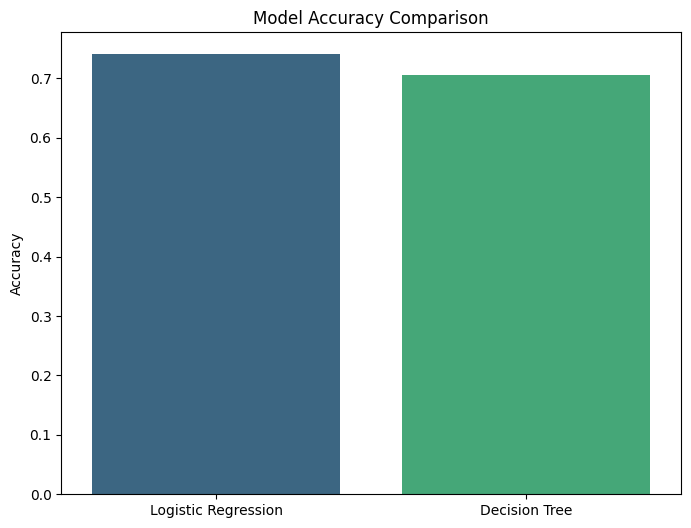

In [73]:
#plot bar graph for accuracy comparison
models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy, dt_accuracy]
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

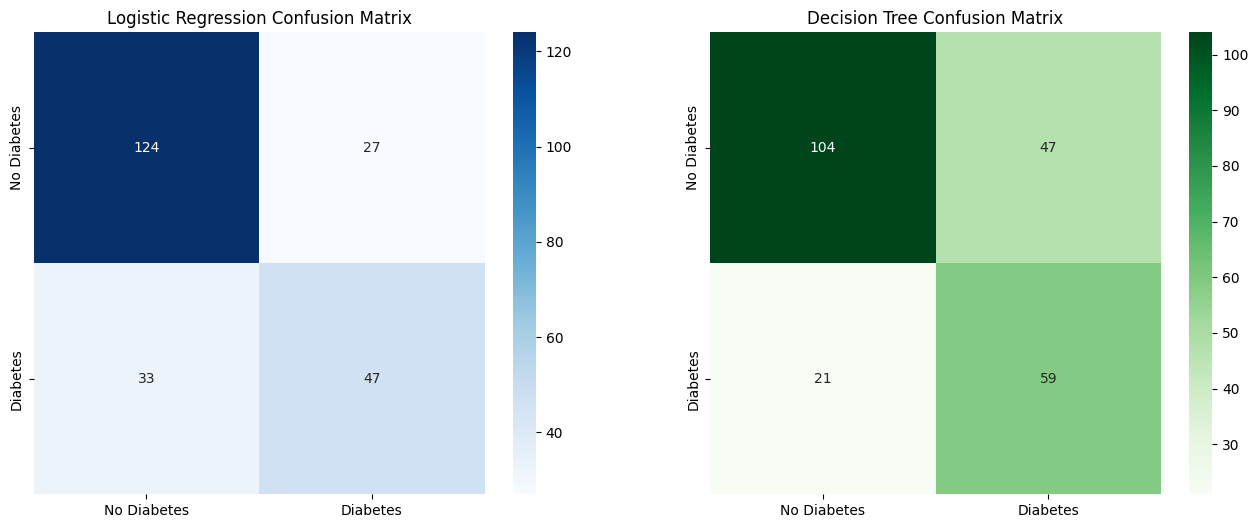

In [74]:
#plot heatmap for confusion matrix comparison
fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
plt.show()

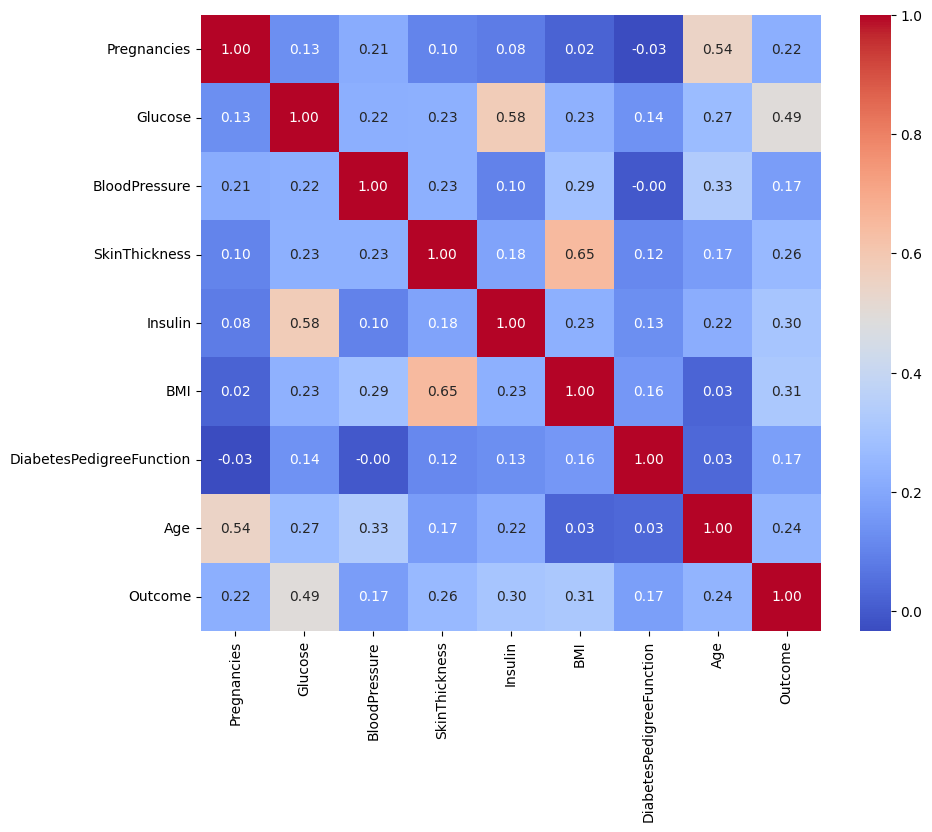

In [75]:
#heatmap for feature correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

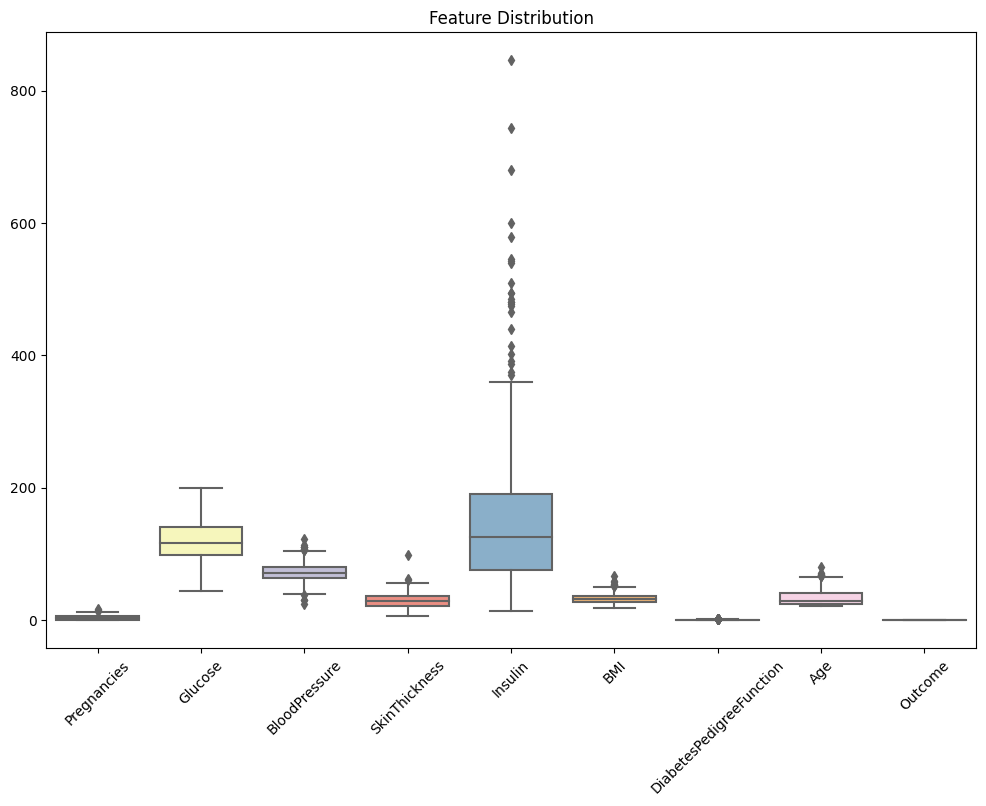

In [76]:
#plot boxplot for feature distribution
plt.figure(figsize=(12,8))
sns.boxplot(data=df, palette='Set3')
plt.title('Feature Distribution')
plt.xticks(rotation=45)
plt.show()

In [80]:
# Comparision of  Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC) in table format.
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [accuracy, precision, recall, f1, auc_score],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc]
})  
print(results)



      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.740260       0.705628
1  Precision             0.635135       0.556604
2     Recall             0.587500       0.737500
3   F1-Score             0.610390       0.634409
4        AUC             0.796689       0.731291


<Figure size 1200x800 with 0 Axes>

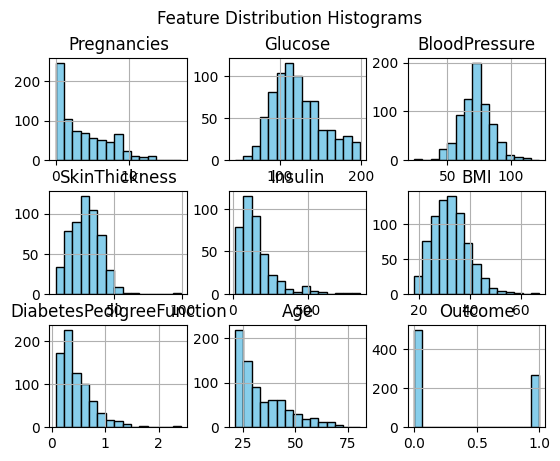

In [83]:
#plot histogram for feature distribution with kde
plt.figure(figsize=(12,8))
df.hist(bins=15, edgecolor='black', color='skyblue')
plt.suptitle('Feature Distribution Histograms')
plt.show()


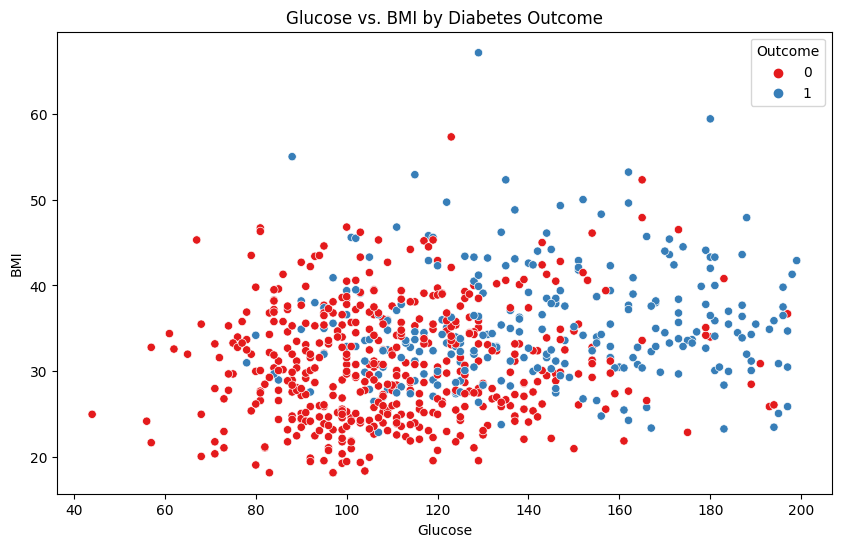

In [85]:
#plot scatter plot for Glucose vs. BMI colored by Outcome
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='Set1')
plt.title('Glucose vs. BMI by Diabetes Outcome')
plt.show()